In [20]:
import pickle
import numpy as np
import pandas as pd

In [37]:
def process_data(fname):
    with open(fname, 'rb') as f:
        data = pickle.load(f)
    data = np.array(data)
    data = data.reshape(-1, 7)

    df = pd.DataFrame(data)
    processed = pd.DataFrame()
    
    # self.local_weights = {k: v.reshape(self.shapes[k]) for k, v in self.weights.items()} - fetch from ps
    processed['reshape_1'] = df[1] - df[0] 
    
    # gradient, info = self.compute_gradient(self.local_weights)
    # - compute gradient of data using local weights
    processed['compute_2'] = df[2] - df[1] 
    
    #  self.policy.model_update(gradient) - update local model
    processed['update_3'] = df[3] - df[2] 
    
    # new_params = self.policy.get_weights() - get weights from local model
    processed['get_weights_4'] = df[4] - df[3] 
    
    # delta = parameter_delta(new_params, self.local_weights) - calculate delta 
    processed['get_delta_5'] = df[5] - df[4] 
    
    # self.apply_delta(delta) - apply delta to ps
    processed['apply_delta_6'] = df[6] - df[5] 
    return processed

In [38]:
%matplotlib inline
process_data("results_4.p").mean() # 4 workers

reshape_1        0.000038
compute_2        0.126122
update_3         0.004232
get_weights_4    0.004248
get_delta_5      0.001143
apply_delta_6    0.020440
dtype: float64

In [39]:
%matplotlib inline
process_data("results_8.p").mean()

reshape_1        0.000044
compute_2        0.145453
update_3         0.004830
get_weights_4    0.004551
get_delta_5      0.001184
apply_delta_6    0.021527
dtype: float64

In [40]:
process_data("results_16.p").mean()

reshape_1        0.000058
compute_2        0.198264
update_3         0.006140
get_weights_4    0.004949
get_delta_5      0.001411
apply_delta_6    0.023071
dtype: float64

In [41]:
process_data("results_32.p").mean()

reshape_1        0.000125
compute_2        0.622486
update_3         0.013675
get_weights_4    0.013691
get_delta_5      0.003005
apply_delta_6    0.034497
dtype: float64

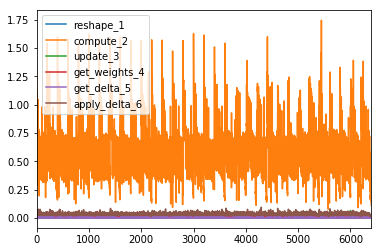

In [42]:
process_data("results_32.p").plot()